In [2]:
# import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [4]:
# read the data
customers = pd.read_csv('Customers.csv')

In [6]:
# get the first rows using head
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Explore Data

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customers.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60.56,50.20
std,57.88,NaN,13.97,26.26,25.82
min,1.00,NaN,18.00,15.00,1.00
25%,50.75,NaN,28.75,41.50,34.75
50%,100.50,NaN,36.00,61.50,50.00
75%,150.25,NaN,49.00,78.00,73.00


In [22]:
customers.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score']

In [31]:
# rename some columns
customers.rename(columns= {'Annual Income (k$)': 'Income','Spending Score (1-100)':'Spending_Score'}, inplace = True)

# Exploratory the data and gain some insights

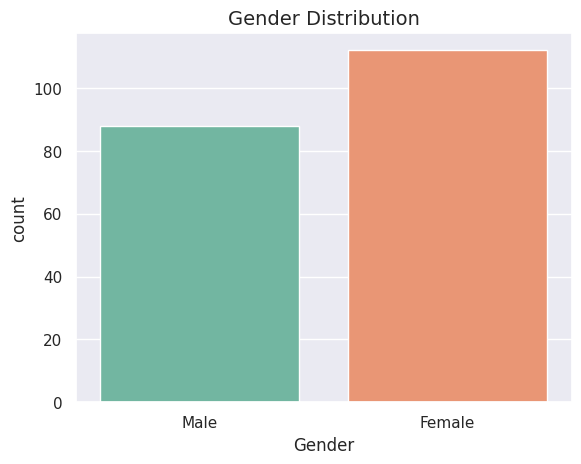

In [14]:
sns.countplot(x = 'Gender', data = customers, palette = 'Set2')
plt.title('Gender Distribution', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Age Distribution')

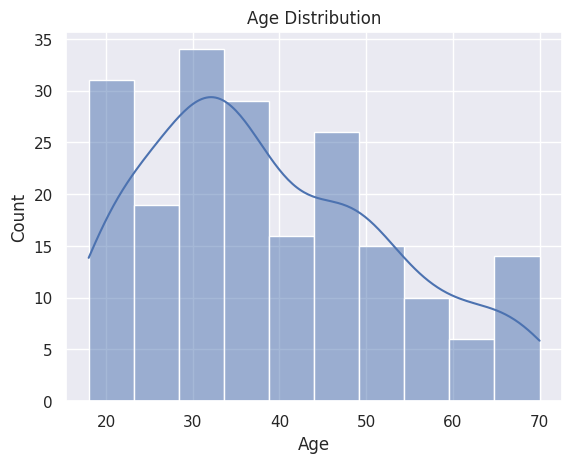

In [16]:
# Age distribution
sns.histplot(customers['Age'], bins=10, kde=True)
plt.title('Age Distribution')

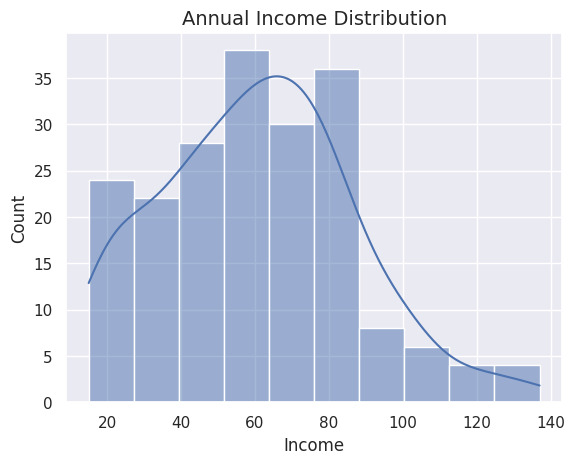

In [26]:
sns.histplot(customers['Income'], bins=10, kde=True)
plt.title('Annual Income Distribution', fontsize = 14)

plt.show()

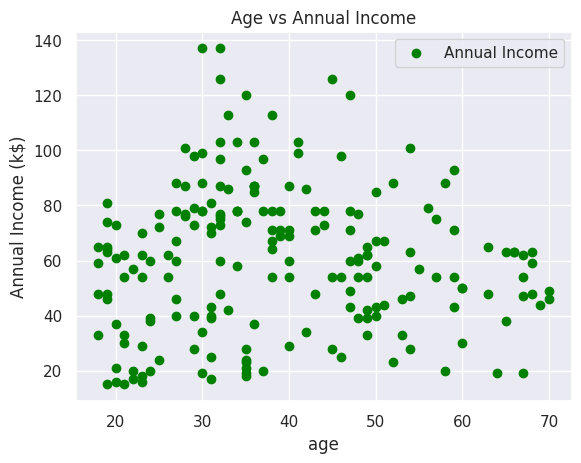

In [43]:
fig, ax = plt.subplots()

ax.scatter(customers['Age'],customers['Income'], color = 'green', marker = 'o')

ax.set_title('Age vs Annual Income')
ax.set_xlabel('age')
ax.set_ylabel('Annual Income (k$)')


ax.legend(['Annual Income'])
plt.show()

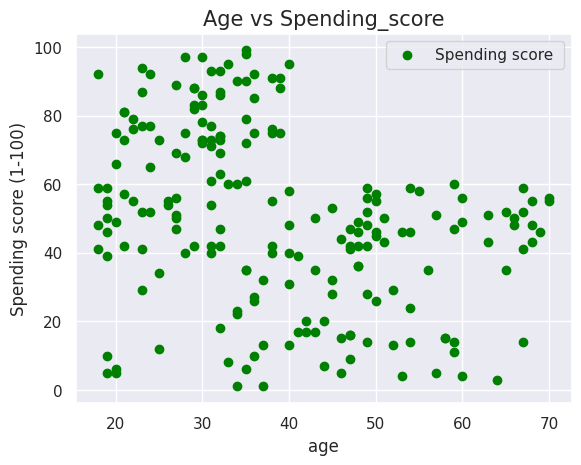

In [46]:
fig, ax = plt.subplots()

ax.scatter(customers['Age'],customers['Spending_Score'], color = 'green', marker = 'o')

ax.set_title('Age vs Spending_score', fontsize = 15)
ax.set_xlabel('age')
ax.set_ylabel('Spending score (1-100)')


ax.legend(['Spending score '])
plt.show()

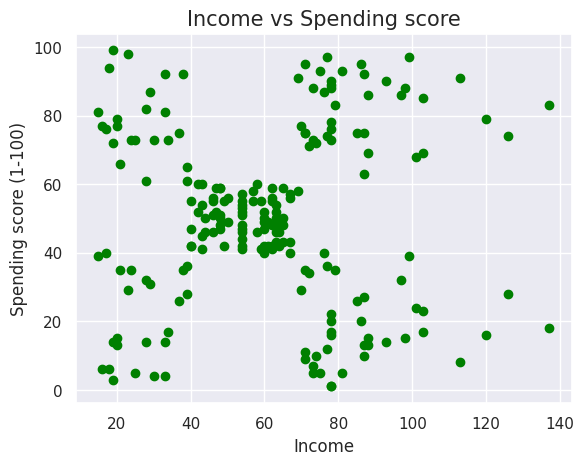

In [49]:
fig, ax = plt.subplots()

ax.scatter(customers['Income'],customers['Spending_Score'], color = 'green', marker = 'o')

ax.set_title('Income vs Spending score', fontsize = 15)
ax.set_xlabel('Income')
ax.set_ylabel('Spending score (1-100)')

plt.show()

# **Preparing data for our Model**

In [50]:
customers[['Income','Spending_Score']].describe().round(2)

,Income,Spending_Score
count,200.00,200.00
mean,60.56,50.20
std,26.26,25.82
min,15.00,1.00
25%,41.50,34.75
50%,61.50,50.00
75%,78.00,73.00
max,137.00,99.00


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
features_scaled = scaler.fit_transform(customers[['Income','Spending_Score']])

In [53]:
features_scaled = pd.DataFrame(features_scaled, columns =['Income','Spending_Score'])

In [54]:
features_scaled.describe().round(2)

,Income,Spending_Score
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


# Cluster Data

In [55]:
from sklearn.cluster import KMeans

In [56]:
km = KMeans(n_clusters=3, n_init= 25 ,  random_state= 1234)

In [57]:
km.fit(features_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [58]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [59]:
km.inertia_

157.7040081503594

# Evaluate and Visualize clusters

In [60]:
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

In [61]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [62]:
clusters_centers = pd.DataFrame(km.cluster_centers_, columns =['Income', 'Spending_Score'])
clusters_centers

,Income,Spending_Score
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


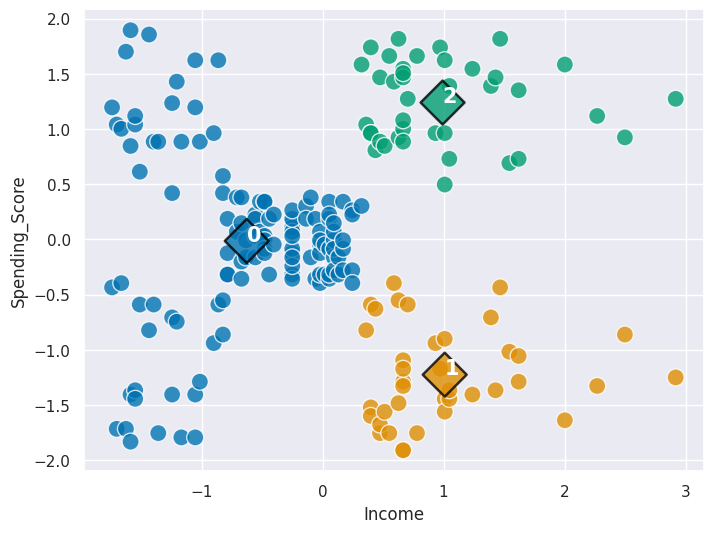

In [63]:
plt.figure(figsize=(8,6))


# plot clusters
ax = sns.scatterplot(data = features_scaled,
                x = 'Income',
                y = 'Spending_Score',
                hue = km.labels_,
                palette = 'colorblind',
                alpha = 0.8,
                s = 150,
                legend = False)

# # plot centeroid
ax = sns.scatterplot(data = clusters_centers,
                      x = 'Income',
                      y = 'Spending_Score',
                      hue = clusters_centers.index,
                      palette = 'colorblind',
                      alpha = 0.8,
                      s = 500,
                      marker = 'D',
                      ec = 'black',
                      legend = False )

# add centroid labels
for i in range(len(clusters_centers)):
    plt.text(x = clusters_centers['Income'][i],
             y = clusters_centers['Spending_Score'][i],
             s = i,
             size = 15,
             weight = 'bold',
             color = 'white')


# Choose the number of Clusters

## The within cluster sum of squares

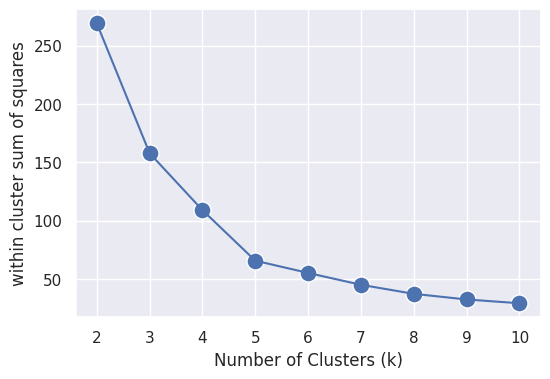

In [ ]:
wcss = []
for k in range(2,11):
   km = KMeans(n_clusters=k, n_init= 25 ,  random_state= 1234)
   km.fit(features_scaled)
   wcss.append(km.inertia_)


wcss_ = pd.Series(wcss, index = range(2,11))

plt.figure(figsize = (6,4))
ax = sns.lineplot(y= wcss_ , x = wcss_.index )
ax = sns.scatterplot(y= wcss_ , x = wcss_.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'within cluster sum of squares')

## The average Silhoutte methode

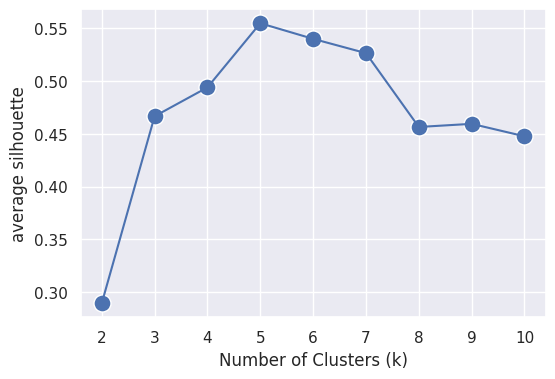

In [ ]:
# import the method
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2,11):
   km = KMeans(n_clusters=k, n_init= 25 ,  random_state= 1234)
   km.fit(features_scaled)
   silhouette.append(silhouette_score(features_scaled, km.labels_))


silhouette_ = pd.Series(silhouette, index = range(2,11))
plt.figure(figsize = (6,4))
ax = sns.lineplot(y= silhouette_ , x = silhouette_.index )
ax = sns.scatterplot(y= silhouette_ , x = silhouette_.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'average silhouette')


## applied our Model with k = 5

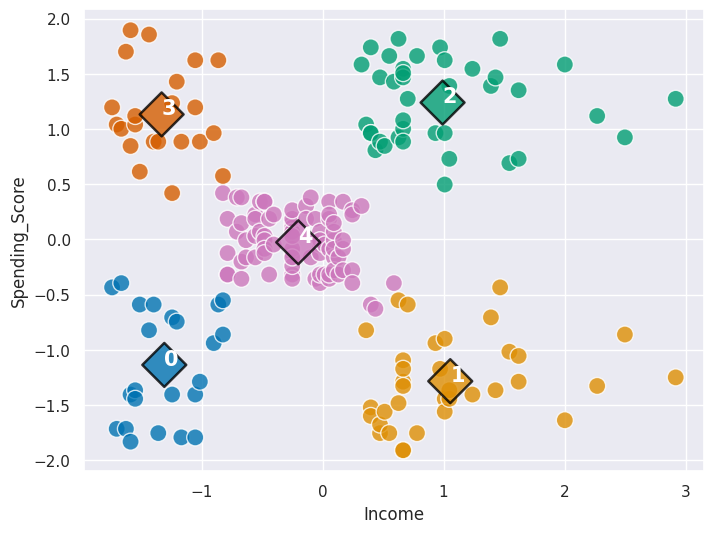

In [ ]:

km = KMeans(n_clusters=5, n_init= 25 ,  random_state= 1234)
km.fit(features_scaled)
clusters_centers = pd.DataFrame(km.cluster_centers_, columns =['Income', 'Spending_Score'])


plt.figure(figsize=(8,6))

# plot clusters
ax = sns.scatterplot(data = features_scaled,
                x = 'Income',
                y = 'Spending_Score',
                hue = km.labels_,
                palette = 'colorblind',
                alpha = 0.8,
                s = 150,
                legend = False)

# plot centeroid
ax = sns.scatterplot(data = clusters_centers,
                      x = 'Income',
                      y = 'Spending_Score',
                      hue = clusters_centers.index,
                      palette = 'colorblind',
                      alpha = 0.8,
                      s = 500,
                      marker = 'D',
                      ec = 'black',
                      legend = False )

# add centroid labels
for i in range(len(clusters_centers)):
    plt.text(x = clusters_centers['Income'][i],
             y = clusters_centers['Spending_Score'][i],
             s = i,
             size = 15,
             weight = 'bold',
             color = 'white')


#**Results**

The K-Means clustering algorithm successfully grouped customers into five distinct segments based on their income and spending score. These segments can serve as the foundation for targeted marketing campaigns and tailored customer experiences.

# Insights:

    Cluster 0: (Label: 0) High income, high spending score.
    Cluster 1: (Label: 1) Moderate income, moderate spending score.
    Cluster 2: (Label: 2) Low income, low spending score.
    Cluster 3: (Label: 3) Low income, high spending score.
    Cluster 4: (Label: 4) Moderate income, low spending score.





# Next Steps:

Develop marketing strategies tailored to each segment's characteristics.
Collect additional customer data for more granular segmentation.
Continuously monitor and adapt strategies based on customer feedback and changing market dynamics.
This project provides valuable insights for optimizing marketing efforts and enhancing customer satisfaction.